In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def draw_line_pts(pt1,pt2,lw=1):
#     print((pt1[0], pt1[1]), (pt2[0], pt2[1]))
    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', lw=lw)
    return pt2

In [42]:
def cab(angle):
    # convert angle to bearing angle
    num = 90 - angle
    while num >= 360:
        num -= 360
    while num <= 0:
        num += 360
    return num

In [43]:
def get_point(pt1, addition, type='xy'):
    l, a = addition
    if type.lower() == 'ad':
        a = math.radians(a)
        x, y= pt1[0]+l*math.cos(a),pt1[1]+l*math.sin(a)
        draw_line_pts(pt1,(x,y))
        return x,y
    
    if type.lower() == 'adb':
        a = math.radians(cab(a))
        x, y= pt1[0]+l*math.cos(a),pt1[1]+l*math.sin(a)
        draw_line_pts(pt1,(x,y))
        return x,y
    
    elif type.lower() == 'ar':
        x, y= pt1[0]+l*math.cos(a),pt1[1]+l*math.sin(a)
        draw_line_pts(pt1,(x,y))
        return x,y
    
    x, y= pt1[0]+l,pt1[1]+a
    draw_line_pts(pt1,(x,y))
    return x,y

In [44]:
def graph(input_var):
    var_break = input_var.upper().split()

    first = list(var_break[0])
    initial, final, distance, angle = first[:1][0], first[-1:][0], var_break[1][:-1], var_break[2][:-1]
#     print(initial, final, distance, angle)

    x,y = var_break[1][-1], var_break[2][-1]
    if x=='D' and y=='A':
        var = ', "ad"'
        print('Drawing point {} to {} at {} distance and {} degrees'.format(initial,final,distance,angle))
    elif x=='D' and y=='R':
        var = ', "ar"'
        print('Drawing point {} to {} at {} distance and {} radians'.format(initial,final,distance,angle))  
    else:
        var = ''
        print('Drawing point {} to {} at {} x-distance and {} y-distance'.format(initial,final,distance,angle))
    
    # E = get_point(A ,(10,-60), 'ad')
    script = (final+' = get_point('+initial+', ('+distance+','+angle+') '+var+')    #'+initial+'-->'+final)
#     print(script)
    return script

In [45]:
def run_this(string):
    A = (0,0)
#     plt.axes().set_aspect('equal', 'datalim')
    lists, exec_string = [], ''
    lists = [graph(_)for _ in string.split('\n') if len(_)>5]
    for _ in lists:
        exec_string += _+'\n'
    print('\n\n'+'-'*50)
    print('Snippet of data:\n\n')
    exec(exec_string,globals())
    print(exec_string)
    print('-'*50)
    return exec_string

In [46]:
# # plt.grid(True)
# plt.axes().set_aspect('equal', 'datalim')
# A = (0,0)
# plt.plot(0, 0.3, 'wo', markersize=1)


# B = get_point(A, (1,0) , "ad")    #A-->B
# C = get_point(B, (1,0) , "ad")    #B-->C
# E = get_point(A, (1,-60) , "ad")    #A-->E
# B = get_point(E, (1,60) , "ad")    #E-->B
# D = get_point(E, (1,0) , "ad")    #E-->D
# D = get_point(B, (1,-60) , "ad")    #B-->D
# C = get_point(D, (1,60) , "ad")    #D-->C

# line_up, = plt.plot(0, 0, 'ro', markersize=12, label='Line 2')
# line_down, = plt.plot(2, 0, 'r^', markersize=12, label='Line 1')


# print(A,B,C,D,E)
# plt.legend([line_up, line_down], ['Roller support', 'Hinge support'])
# plt.show()

Drawing point A to B at 1 distance and 0 degrees
Drawing point B to C at 1 distance and 0 degrees
Drawing point A to E at 1 distance and -60 degrees
Drawing point E to B at 1 distance and 60 degrees
Drawing point E to D at 1 distance and 0 degrees
Drawing point B to D at 1 distance and -60 degrees
Drawing point D to C at 1 distance and 60 degrees


--------------------------------------------------
Snippet of data:


B = get_point(A, (1,0) , "ad")    #A-->B
C = get_point(B, (1,0) , "ad")    #B-->C
E = get_point(A, (1,-60) , "ad")    #A-->E
B = get_point(E, (1,60) , "ad")    #E-->B
D = get_point(E, (1,0) , "ad")    #E-->D
D = get_point(B, (1,-60) , "ad")    #B-->D
C = get_point(D, (1,60) , "ad")    #D-->C

--------------------------------------------------
(0, 0) (1.0000000000000002, 0.0) (2.0000000000000004, 0.0) (1.5000000000000004, -0.8660254037844386) (0.5000000000000001, -0.8660254037844386)


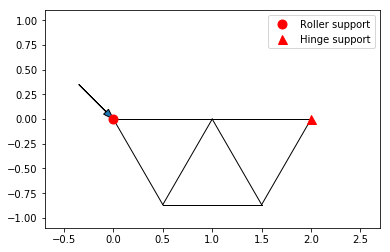

In [47]:
plt.axes().set_aspect('equal', 'datalim')
A = (0,0)
plt.plot(0, 1, 'wo', markersize=1)
plt.plot(0, -1, 'wo', markersize=1)

string = '''
A>B 1d 0a
B>c 1d 0a
A>e 1d -60a
e>b 1d 60a
e>d 1d 0a
b>d 1d -60a
d>c 1d 60a
'''

string = run_this(string)
line_up, = plt.plot(0, 0, 'ro', markersize=9, label='Line 2')
line_down, = plt.plot(2, 0, 'r^', markersize=9, label='Line 1')
plt.arrow(-0.35,0.35,0.35,-0.35, shape='full', lw=1, length_includes_head=True, head_width=.07)

print(A,B,C,D,E)
plt.legend([line_up, line_down], ['Roller support', 'Hinge support'])
plt.show()